In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import string
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
data=pd.read_csv('/content/train.csv')

In [1]:
#data_copy=data.copy() #EDA before Preprocessing 

In [5]:
#data_copy

In [ ]:
#finding number of target variable of each category

In [6]:
Real_len=data[data['target']==1].shape[0]
Fake_len=data[data['target']==0].shape[0]

In [7]:
Real_len

3271

In [8]:
Fake_len

4342

In [9]:
import matplotlib.pyplot as plt

In [10]:
#properties of Target Variable

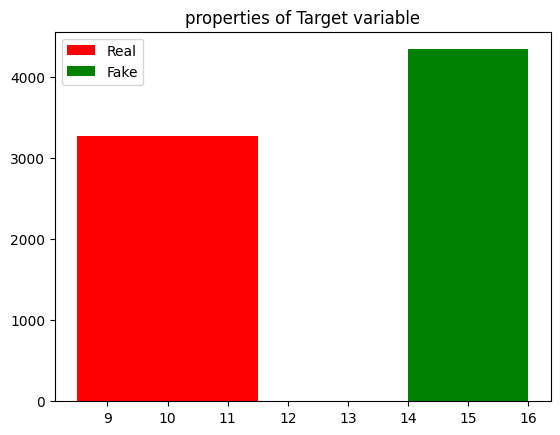

In [11]:
plt.bar(10,Real_len,width=3,label='Real',color='Red')
plt.bar(15,Fake_len,width=2,label='Fake',color='green')
plt.legend()
plt.title('properties of Target variable')
plt.show()

In [ ]:
#value count of Target Variable by percent

<Axes: ylabel='target'>

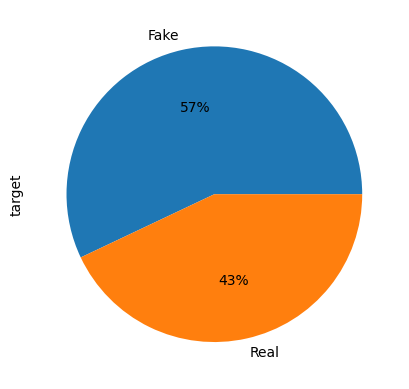

In [12]:
data.target.value_counts().plot(kind='pie',labels=['Fake','Real'],autopct='%1.0f%%')

In [ ]:
#length of characters

In [13]:
data['length']=data['text'].apply(lambda x: len(x))
data

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


In [15]:
#ploting histogram based on length of characters of Real and Fake tweets

In [18]:
plt.style.use('ggplot')

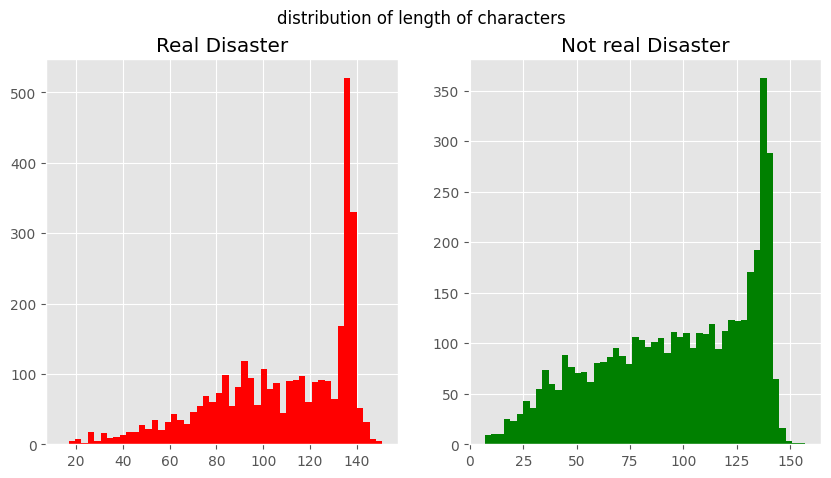

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('distribution of length of characters')
ax1.hist(data[data['target']==1]['length'],color='red',bins=50)
ax1.set_title('Real Disaster')
ax2.set_title('Not real Disaster')
ax2.hist(data[data['target']==0]['length'],color='green',bins=50)
fig.show()

In [20]:
#No. of words in a tweet
data['n_words']=data['text'].apply(lambda x: len(x.split()))

In [ ]:
#data_copy[data_copy['target']==1]['text'].str.split().map(lambda x: len(x))

In [21]:
data

,id,keyword,location,text,target,length,n_words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19


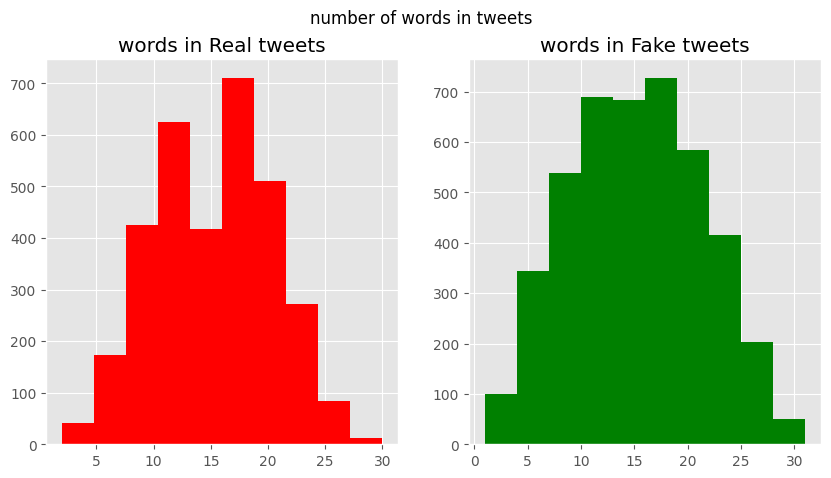

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.hist(data[data['target']==1]['n_words'],color='red')
ax2.hist(data[data['target']==0]['n_words'],color='green')
ax1.set_title('words in Real tweets')
ax2.set_title('words in Fake tweets')
fig.suptitle('number of words in tweets')
plt.style.use('ggplot')
plt.show()

<Axes: xlabel='target'>

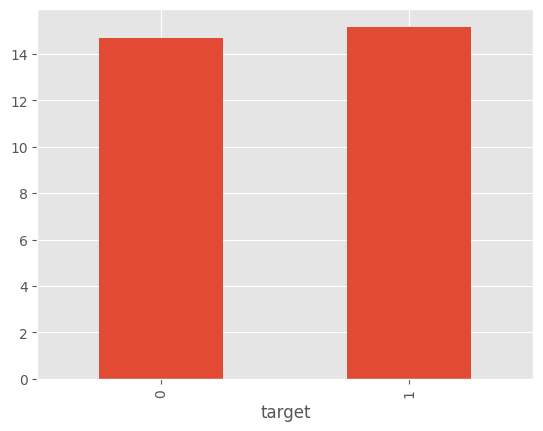

In [23]:
data.groupby('target')['n_words'].mean().plot(kind='bar')

In [24]:
#Above graph shows not much difference in number of words

In [25]:
data

,id,keyword,location,text,target,length,n_words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19


In [26]:
Y=data['target']
Y

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [27]:
data=data.drop('target',axis=1)

In [28]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.7 MB/s eta 0:00:00


In [29]:
import contractions

In [30]:
#Removing Contractions

In [31]:
data['text_processed']=data['text'].apply(lambda x:[contractions.fix(word) for word in x.split()] )

In [ ]:
#joining back again

In [32]:
data['text_processed']=[' '.join(map(str, l)) for l in data['text_processed']]

In [33]:
data

,id,keyword,location,text,length,n_words,text_processed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,13,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,7,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,22,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,8,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,16,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,11,Two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,20,@aria_ahrary @TheTawniest The out of control w...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,8,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,137,19,Police investigating after an e-bike collided ...


In [34]:
#tokenizing the text

In [35]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [36]:
data['text_processed']=data['text_processed'].apply(word_tokenize)

In [37]:
data

,id,keyword,location,text,length,n_words,text_processed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,13,"[Our, Deeds, are, the, Reason, of, this, #, ea..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,7,"[Forest, fire, near, La, Ronge, Sask, ., Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,22,"[All, residents, asked, to, 'shelter, in, plac..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,8,"[13,000, people, receive, #, wildfires, evacua..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,16,"[Just, got, sent, this, photo, from, Ruby, #, ..."
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,11,"[Two, giant, cranes, holding, a, bridge, colla..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,20,"[@, aria_ahrary, @, TheTawniest, The, out, of,..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,8,"[M1.94, [, 01:04, UTC, ], ?, 5km, S, of, Volca..."
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,137,19,"[Police, investigating, after, an, e-bike, col..."


In [38]:
#converting to lowercase

In [39]:
data['text_processed']=data['text_processed'].apply(lambda x:[word.lower() for word in x])

In [ ]:
#removing punctuations

In [40]:
punc=string.punctuation
data['text_processed']=data['text_processed'].apply(lambda x:[word for word in x if word not in punc])

In [41]:
data

,id,keyword,location,text,length,n_words,text_processed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,13,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,7,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,22,"[all, residents, asked, to, 'shelter, in, plac..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,8,"[13,000, people, receive, wildfires, evacuatio..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,16,"[just, got, sent, this, photo, from, ruby, ala..."
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,11,"[two, giant, cranes, holding, a, bridge, colla..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,20,"[aria_ahrary, thetawniest, the, out, of, contr..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,8,"[m1.94, 01:04, utc, 5km, s, of, volcano, hawai..."
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,137,19,"[police, investigating, after, an, e-bike, col..."


In [42]:
#removing stopwords

In [43]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['text_processed']=data['text_processed'].apply(lambda x:[word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [44]:
data

,id,keyword,location,text,length,n_words,text_processed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,13,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,7,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,22,"[residents, asked, 'shelter, place, notified, ..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,8,"[13,000, people, receive, wildfires, evacuatio..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,16,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,11,"[two, giant, cranes, holding, bridge, collapse..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,20,"[aria_ahrary, thetawniest, control, wild, fire..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,8,"[m1.94, 01:04, utc, 5km, volcano, hawaii, http..."
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,137,19,"[police, investigating, e-bike, collided, car,..."


In [ ]:
#data_temp=data.copy()

In [ ]:
# data_temp['text_no_contractions'] = data_temp['text_no_contractions'].apply(lambda x: [re.sub('\W+','', i ) for i in x ] )
# data_temp

In [ ]:
# data_temp['text_no_contractions'] = data_temp['text_no_contractions'].apply(lambda x: [re.sub('[0-9]','', i ) for i in x ] )
# data_temp

In [45]:
import re

In [46]:
data['text_processed'] = data['text_processed'].apply(lambda x: [re.sub('[^a-zA-Z]+','',i) for i in x ] )
data

,id,keyword,location,text,length,n_words,text_processed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,13,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,7,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,22,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,8,"[, people, receive, wildfires, evacuation, ord..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,16,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,11,"[two, giant, cranes, holding, bridge, collapse..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,20,"[ariaahrary, thetawniest, control, wild, fires..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,8,"[m, , utc, km, volcano, hawaii, http, tcozdtoy..."
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,137,19,"[police, investigating, ebike, collided, car, ..."


In [47]:
punc=string.punctuation
data['text_processed']=data['text_processed'].apply(lambda x:[word for word in x if word not in punc])
data

,id,keyword,location,text,length,n_words,text_processed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,13,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,7,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,22,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,8,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,16,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,11,"[two, giant, cranes, holding, bridge, collapse..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,20,"[ariaahrary, thetawniest, control, wild, fires..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,8,"[m, utc, km, volcano, hawaii, http, tcozdtoydebj]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,137,19,"[police, investigating, ebike, collided, car, ..."


In [ ]:
#lemmatization

In [ ]:
#pos tagging using NLTK library

In [48]:
nltk.download('averaged_perceptron_tagger')
data['text_processed']=data['text_processed'].apply(nltk.tag.pos_tag)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [49]:
data

,id,keyword,location,text,length,n_words,text_processed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,13,"[(deeds, NNS), (reason, NN), (earthquake, NN),..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,7,"[(forest, JJS), (fire, NN), (near, IN), (la, J..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,22,"[(residents, NNS), (asked, VBD), (shelter, JJ)..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,8,"[(people, NNS), (receive, VBP), (wildfires, NN..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,16,"[(got, VBD), (sent, JJ), (photo, NN), (ruby, N..."
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,11,"[(two, CD), (giant, JJ), (cranes, NNS), (holdi..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,20,"[(ariaahrary, JJ), (thetawniest, JJS), (contro..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,8,"[(m, NN), (utc, JJ), (km, NN), (volcano, NN), ..."
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,137,19,"[(police, NNS), (investigating, VBG), (ebike, ..."


In [ ]:
#converting to wordnet pos tagging

In [50]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
data['text_processed'] = data['text_processed'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
data.head()

,id,keyword,location,text,length,n_words,text_processed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,13,"[(deeds, n), (reason, n), (earthquake, n), (ma..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,7,"[(forest, a), (fire, n), (near, n), (la, a), (..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,22,"[(residents, n), (asked, v), (shelter, a), (pl..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,8,"[(people, n), (receive, v), (wildfires, n), (e..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,16,"[(got, v), (sent, a), (photo, n), (ruby, n), (..."


In [51]:
lemma=WordNetLemmatizer()
data['text_processed']=data['text_processed'].apply(lambda x: [lemma.lemmatize(word,tag) for word,tag in x])

In [52]:
data

,id,keyword,location,text,length,n_words,text_processed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,13,"[deed, reason, earthquake, may, allah, forgive..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,7,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,22,"[resident, ask, shelter, place, notify, office..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,8,"[people, receive, wildfire, evacuation, order,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,16,"[get, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,11,"[two, giant, crane, hold, bridge, collapse, ne..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,20,"[ariaahrary, thetawniest, control, wild, fire,..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,8,"[m, utc, km, volcano, hawaii, http, tcozdtoydebj]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,137,19,"[police, investigate, ebike, collide, car, lit..."


In [ ]:
#sentiment Analysis

In [53]:
data

,id,keyword,location,text,length,n_words,text_processed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,13,"[deed, reason, earthquake, may, allah, forgive..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,7,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,22,"[resident, ask, shelter, place, notify, office..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,8,"[people, receive, wildfire, evacuation, order,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,16,"[get, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,11,"[two, giant, crane, hold, bridge, collapse, ne..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,20,"[ariaahrary, thetawniest, control, wild, fire,..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,8,"[m, utc, km, volcano, hawaii, http, tcozdtoydebj]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,137,19,"[police, investigate, ebike, collide, car, lit..."


In [ ]:
#converting to string

In [54]:
data['text_processed']=[' '.join(map(str,l)) for l in data['text_processed']]
data

,id,keyword,location,text,length,n_words,text_processed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,13,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,7,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,22,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,8,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,16,get sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,11,two giant crane hold bridge collapse nearby ho...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,20,ariaahrary thetawniest control wild fire calif...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,8,m utc km volcano hawaii http tcozdtoydebj
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,137,19,police investigate ebike collide car little po...


In [55]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Sentiment Analysis

In [56]:
from textblob import TextBlob

In [57]:
data['sentiment']=data['text_processed'].apply(lambda x: TextBlob(x).sentiment.polarity)
data

,id,keyword,location,text,length,n_words,text_processed,sentiment
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,13,deed reason earthquake may allah forgive u,0.000000
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,7,forest fire near la ronge sask canada,0.100000
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,22,resident ask shelter place notify officer evac...,0.000000
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,8,people receive wildfire evacuation order calif...,0.000000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,16,get sent photo ruby alaska smoke wildfires pou...,0.000000
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,11,two giant crane hold bridge collapse nearby ho...,0.000000
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,20,ariaahrary thetawniest control wild fire calif...,0.100000
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,8,m utc km volcano hawaii http tcozdtoydebj,0.000000
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,137,19,police investigate ebike collide car little po...,-0.260417


In [58]:
data['target']=Y

In [59]:
data

,id,keyword,location,text,length,n_words,text_processed,sentiment,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,13,deed reason earthquake may allah forgive u,0.000000,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,7,forest fire near la ronge sask canada,0.100000,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,22,resident ask shelter place notify officer evac...,0.000000,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,8,people receive wildfire evacuation order calif...,0.000000,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,16,get sent photo ruby alaska smoke wildfires pou...,0.000000,1
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,11,two giant crane hold bridge collapse nearby ho...,0.000000,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,20,ariaahrary thetawniest control wild fire calif...,0.100000,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,8,m utc km volcano hawaii http tcozdtoydebj,0.000000,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,137,19,police investigate ebike collide car little po...,-0.260417,1


Text(0.5, 1.0, 'sentiment distribution of the tweets')

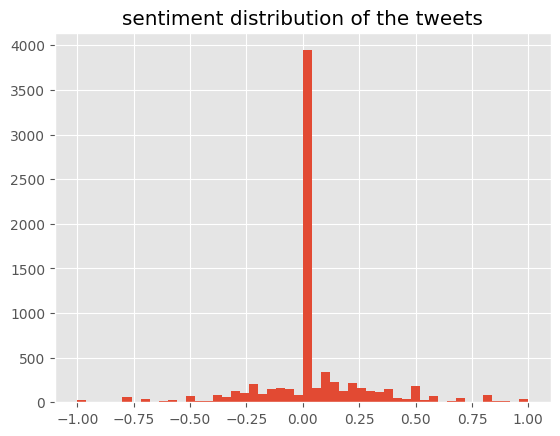

In [60]:
plt.hist(data['sentiment'],bins=50)
plt.title('sentiment distribution of the tweets')

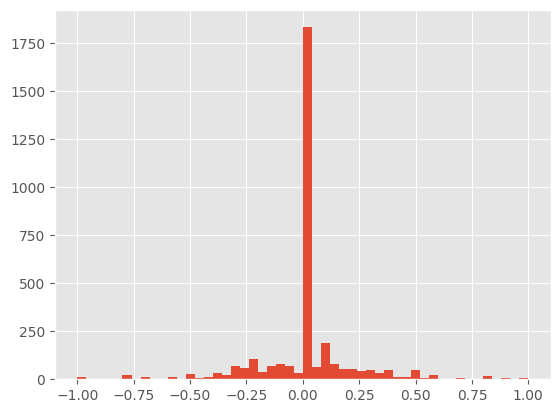

In [61]:
plt.hist(data[data['target']==1]['sentiment'],bins=50)
plt.show()

In [ ]:
#data[data['target']==0]

In [62]:
#histogram shows most of the tweets are nearly neutral

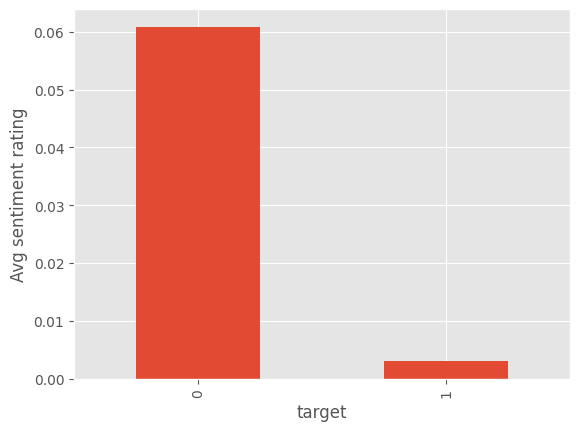

In [63]:
polarity_avg=data.groupby('target')['sentiment'].mean().plot(kind='bar')
plt.ylabel('Avg sentiment rating')
plt.show()

In [64]:
#this barplot shows that both Real and Fake disaster tweets have positive Avg sentiment rating

In [ ]:
#topic modelling-finding most frequent Topics

In [65]:
data

,id,keyword,location,text,length,n_words,text_processed,sentiment,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,13,deed reason earthquake may allah forgive u,0.000000,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,7,forest fire near la ronge sask canada,0.100000,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,22,resident ask shelter place notify officer evac...,0.000000,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,8,people receive wildfire evacuation order calif...,0.000000,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,16,get sent photo ruby alaska smoke wildfires pou...,0.000000,1
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,11,two giant crane hold bridge collapse nearby ho...,0.000000,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,20,ariaahrary thetawniest control wild fire calif...,0.100000,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,8,m utc km volcano hawaii http tcozdtoydebj,0.000000,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,137,19,police investigate ebike collide car little po...,-0.260417,1


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

In [68]:
tfidf=tfidf_vectorizer.fit_transform(data['text_processed'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aaceorg,aal,aan,aannnnd,aar,...,zonewolf,zoom,zotar,zouma,zourryart,zrnf,zumiez,zurich,zxathetis,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Topic Modelling

In [69]:
from sklearn.decomposition import NMF   

In [70]:
def display_topics(model, feature_names, no_top_words):             #--------
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [71]:
nmf = NMF(n_components=10, random_state=0, init='nndsvd').fit(tfidf)   #--------
display_topics(nmf, tfidf_feature_names, 10)

Topic 0:
http via crash new video flood body emergency full kill
Topic 1:
like go look would one amp want feel know people
Topic 2:
mh malaysia confirm wreckage pm conclusively investigator debris family reunion
Topic 3:
suicide bomb bomber detonate pkk yr old turkey trench army
Topic 4:
get watch sandstorm minute swallow airport http go wreck lol
Topic 5:
fire building forest burn wild truck california evacuate bush set
Topic 6:
disaster obama declare typhoondevastated saipan declaration sign northern marians natural
Topic 7:
family outbreak fatal sue legionnaires affect legionnaire disea http disease
Topic 8:
reddit quarantine content go policy offensive new subreddits horrible effect
Topic 9:
california home wildfire late raze northern news abc http nearby


In [ ]:
#Last step-modelling and predictions

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test=train_test_split(doc_term_matrix_tfidf,Y,test_size=0.2,random_state=0)

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
from sklearn.metrics import mean_absolute_error

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
model= RandomForestClassifier(max_depth=5)


In [78]:
model.fit(X_train,y_train)
y_val=model.predict(X_test)
mean_absolute_error(y_val,y_test)

0.39198949441891007

In [79]:
accuracy_score(y_test,y_val)

0.6080105055810899

In [ ]:
#from sklearn import model_selection

In [ ]:
#model_selection.cross_val_score(model,doc_term_matrix_tfidf,Y,cv=3,scoring='f1')

In [80]:
test_data=pd.read_csv('/content/test.csv')
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [81]:
test_data['text_processed']=test_data['text'].apply(lambda x:[contractions.fix(word) for word in x.split()] )
test_data['text_processed']=[' '.join(map(str, l)) for l in test_data['text_processed']]
test_data['text_processed']=test_data['text_processed'].apply(word_tokenize) 
test_data['text_processed']=test_data['text_processed'].apply(lambda x:[word.lower() for word in x])
punc=string.punctuation
test_data['text_processed']=test_data['text_processed'].apply(lambda x:[word for word in x if word not in punc])
test_data['text_processed']=test_data['text_processed'].apply(lambda x:[word for word in x if word not in stop_words])
test_data['text_processed'] =test_data['text_processed'].apply(lambda x: [re.sub('[^a-zA-Z]+','',i) for i in x ] )
test_data['text_processed']=test_data['text_processed'].apply(lambda x:[word for word in x if word not in punc])

nltk.download('averaged_perceptron_tagger')
test_data['text_processed']=test_data['text_processed'].apply(nltk.tag.pos_tag)
test_data['text_processed']=test_data['text_processed'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

test_data

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,id,keyword,location,text,text_processed
0,0,NaN,NaN,Just happened a terrible car crash,"[(happened, v), (terrible, a), (car, n), (cras..."
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","[(heard, r), (earthquake, n), (different, a), ..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","[(forest, a), (fire, n), (spot, n), (pond, n),..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,"[(apocalypse, n), (lighting, v), (spokane, n),..."
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,"[(typhoon, n), (soudelor, n), (kills, v), (chi..."
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,"[(earthquake, n), (safety, n), (los, n), (ange..."
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,"[(storm, n), (ri, n), (worse, a), (last, a), (..."
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,"[(green, a), (line, n), (derailment, n), (chic..."
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,"[(meg, n), (issues, n), (hazardous, a), (weath..."


In [82]:
lemma=WordNetLemmatizer()
test_data['text_processed']=test_data['text_processed'].apply(lambda x: [lemma.lemmatize(word,tag) for word,tag in x])

In [83]:
test_data

,id,keyword,location,text,text_processed
0,0,NaN,NaN,Just happened a terrible car crash,"[happen, terrible, car, crash]"
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","[heard, earthquake, different, city, stay, saf..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","[forest, fire, spot, pond, geese, flee, across..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,"[apocalypse, light, spokane, wildfire]"
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,"[typhoon, soudelor, kill, china, taiwan]"
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,"[earthquake, safety, los, angeles, safety, fas..."
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,"[storm, ri, bad, last, hurricane, city, amp, o..."
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,"[green, line, derailment, chicago, http, tcout..."
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,"[meg, issue, hazardous, weather, outlook, hwo,..."


In [84]:
test_data['text_processed']=[' '.join(map(str, l)) for l in test_data['text_processed']]

In [85]:
# tfidf_vectorizer=TfidfVectorizer(use_idf=True)
tfidf=tfidf_vectorizer.transform(test_data['text_processed'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
doc_term_matrix_tfidf2 = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf2

,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aaceorg,aal,aan,aannnnd,aar,...,zonewolf,zoom,zotar,zouma,zourryart,zrnf,zumiez,zurich,zxathetis,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
y_val=model.predict(doc_term_matrix_tfidf2)

In [87]:
y_vall=pd.DataFrame(y_val,columns=['output'])

In [88]:
submission=pd.DataFrame()
submission['id']=test_data['id']
submission['target']=y_vall['output']


In [89]:
submission.to_csv('output.csv', index=False)

In [90]:
from google.colab import files
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>